## Question 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls
from scipy.optimize import line_search

In [13]:
def squared_norm(x):
    x_val = np.float64(x[0][0])
    y_val = np.float64(x[1][0])
    return x_val*x_val + y_val*y_val

def norm(x):
    return np.sqrt(squared_norm(x))

def get_unit_vector(x):
    norm_value = norm(x)
    if norm_value == np.float64(0.0):
        return x
    return (x/norm_value).copy()

In [14]:
def f1(x,y):
    vec = np.array([[x],[y]])
    A = np.array([[1,0],[0,1]])
    h = np.matmul(vec.T,A)
    return 0.5*np.matmul(h,vec)

def f2(x,y):
    vec = np.array([[x],[y]])
    A = np.array([[10,8],[8,10]])
    h = np.matmul(vec.T,A)
    return 0.5*np.matmul(h,vec)
    
def gradient_f1(x):
    x_value = np.float64(x[0][0])
    y_value = np.float64(x[1][0])
    return np.array([[x_value],[y_value]])

def gradient_f2(x):
    x_value = np.float64(x[0][0])
    y_value = np.float64(x[1][0])
    return np.array([[10*x_value + 8 *y_value],[10*y_value + 8 * x_value]])

def hessian_f1(x):
    return np.array([[1,0],[0,1]])

def hessian_f2(x):
    return np.array([[10,8],[8,10]])

In [ ]:
def steepest_descent(initial_point,function='f1'):

    #initial_point = np.array([[2.0],[0.0]],dtype=np.float64)
    fun = f1 if function == 'f1' else f2
    gradient_fun = gradient_f1 if function == 'f1' else gradient_f2

    current_point = initial_point.copy()
    
    c = 0.0001
    rho = 0.9
    iterations = 0
    iterates = []

    iterates.append(current_point)

    while True:        
        
        iterations += 1
        gradient = gradient_fun(current_point)
        p = -get_unit_vector(gradient)            
        alpha  = np.float64(1.0)
        previous_point = current_point.copy() 
        break_inner_loop = False
    
        current_x = np.float64(current_point[0][0])
        current_y = np.float64(current_point[1][0])

        current_function_value = np.float64(fun(current_x,current_y).squeeze()) 
        while not break_inner_loop:
            
            new_point = current_point + alpha*p

            new_x = np.float64(new_point[0][0])
            new_y = np.float64(new_point[1][0])

            new_function_value = np.float64(fun(new_x,new_y).squeeze())
            increment_value = np.float64(((c*alpha)*np.dot(gradient.T,p)).squeeze())

            if((new_function_value > (current_function_value + increment_value))):
                alpha = alpha * rho
            else:
                break_inner_loop = True
     

        new_point = current_point + alpha*p
        current_point = new_point.copy()
        iterates.append(current_point)
        if np.linalg.norm(current_point-previous_point) < 0.00001:
            break
    return iterations,iterates


In [ ]:
initial_point = np.array([[2.0],[2.0]],dtype=np.float64)
iterations , iterates = steepest_descent(initial_point=initial_point,function='f2')

In [ ]:
def newtons_method(initial_point,function = 'f1'):

    fun = f1 if function == 'f1' else f2
    gradient_fun = gradient_f1 if function == 'f1' else gradient_f2
    hessian_fun = hessian_f1 if function =='f1' else hessian_f2
    current_point = initial_point.copy()
    
    iterations = 0
    iterates = []
    iterates.append(current_point)
    c = 0.0001
    rho = 0.9

    while True:        
        iterations+=1
        gradient = gradient_fun(current_point)
        hessian = hessian_fun(current_point)
        m = np.matmul(np.linalg.inv(hessian),gradient)
        p = -m
        
        break_inner_loop = False
        alpha  = np.float64(1.0)
 
        current_x = np.float64(current_point[0][0])
        current_y = np.float64(current_point[1][0])

        current_function_value = np.float64(fun(current_x,current_y).squeeze()) 
        
        while not break_inner_loop:
            new_point = current_point + alpha*p
            new_x = np.float64(new_point[0][0])
            new_y = np.float64(new_point[1][0])

            new_function_value = np.float64(fun(new_x,new_y).squeeze())

            increment_value = np.float64(((c*alpha)*np.dot(gradient.T,p)).squeeze())
            second_order_term = (c*(alpha*alpha/2)*(np.matmul(np.matmul(p.T,hessian),p))).squeeze()
            increment_value += np.float64(second_order_term)
            
            if((new_function_value > (current_function_value + increment_value))):
                alpha = alpha * rho
            else:
                break_inner_loop = True
      
        
        previous_point = current_point.copy() 
        new_point = current_point + alpha*p
        current_point = new_point.copy()
        iterates.append(current_point)
        if np.linalg.norm(current_point-previous_point) < 0.00001:
            break
    
    return iterations,iterates

In [ ]:
initial_point = np.array([[2.0],[0.0]],dtype=np.float64)
iterations , iterates = newtons_method(initial_point=initial_point,function='f2')

[array([[-1.2],
       [ 1. ]]), array([[-1.20177419],
       [ 1.22425806]]), array([[-1.20360991],
       [ 1.33867187]]), array([[-1.20547588],
       [ 1.39816615]]), array([[-1.20735522],
       [ 1.43020012]]), array([[-1.20923917],
       [ 1.44850256]]), array([[-1.21112328],
       [ 1.45993766]]), array([[-1.21112328],
       [ 1.45993766]])]


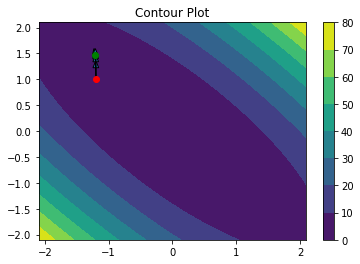

In [97]:
def plot(function,iterations,iterates):
    
    if function == 'f1':
        fun = f1
    else:
        fun = f2

    res = 1000
    x_values = np.linspace(2.1,-2.1,res)
    y_values = np.linspace(2.1,-2.1,res)
    
    X,Y = np.meshgrid(x_values,y_values)

    Z = np.zeros((res,res))
    for i in range(len(X[0])):
        for j in range(len(Y[:,0])):
            z_value = fun(X[0,i],Y[j,0])
            Z[i][j] = z_value
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z)
    fig.colorbar(cp) 
    ax.set_title('Contour Plot')
    plt.plot(iterates[0][0,0],iterates[0][1,0],'ro')
    for i in range(1,len(iterates)):
        plt.arrow(iterates[i-1][0,0],iterates[i-1][1,0],dx = iterates[i][0,0] - iterates[i-1][0,0] ,dy = iterates[i][1,0] - iterates[i-1][1,0],width=0.01,head_width = 0.09)
    plt.plot(iterates[len(iterates)-1][0,0], iterates[len(iterates)-1][1,0],'go',linewidth=0.1)
    plt.show()
            
    

print(iterates)
    
plot(function='f2',iterates= iterates, iterations =iterations)

In [ ]:
initial_point = np.array([[150.0],[20.0]],dtype=np.float64)
newtons_method(initial_point,function='f2')

In [ ]:
min

### Question 3

In [ ]:
from scipy.optimize import rosen,rosen_der
from scipy.optimize import line_search
from scipy.optimize import minimize

In [ ]:

def rosenbrock(point):
    a = 1.0
    b = 100.0
    x = point[0]
    y = point[1]
    result = (1-x)**2
    result += b*((y - x**2)**2)
    return result

def rosenbrock_jacobian(point):
    a = 1.0
    b = 100.0
    x = point[0]
    y = point[1]
    result = np.zeros((2,))
    result[0] = -2.0*(a-x) - 4*b*x*(y - x**2)
    result[1] = 2.0*b*(y - x**2)
    return result

def rosenbrock_hessian(point):
    a = 1.0
    b = 100.0
    x = point[0]
    y = point[1]
    hessian = np.zeros((2,2))
    hessian[0][0] = 2*b*y - 2*b*x*x
    hessian[0][1] = -4*b*x
    hessian[1][0] = -4*b*x
    hessian[1][1] = 2*b 
    return hessian


In [85]:
def steepest_descent_rosenbrock(point):

    fun = rosenbrock
    gradient_fun = rosenbrock_jacobian
    
    current_point = point.copy()
    c = 0.0001
    rho = 0.9
    iterations = 0
    
    step_sizes = []
    iterates = []
    function_values = []
    
    iterates.append(current_point)
    function_values.append(np.float64(fun(current_point.squeeze()).squeeze()))

    while True:        
        iterations += 1
        gradient = gradient_fun(current_point)
        gradient = np.expand_dims(gradient,axis=1)
        p = -get_unit_vector(gradient)            
        alpha  = np.float64(1.0)
        previous_point = current_point.copy() 
        break_inner_loop = False
    
        current_function_value = np.float64(fun(current_point.squeeze()).squeeze()) 
        while not break_inner_loop:
            
            new_point = current_point + alpha*p

            new_function_value = np.float64(fun(new_point.squeeze()).squeeze())
            increment_value = np.float64(((c*alpha)*np.dot(gradient.T,p)).squeeze())

            if((new_function_value > (current_function_value + increment_value))):
                alpha = alpha * rho
            else:
                break_inner_loop = True
     
        step_sizes.append(alpha)
        new_point = current_point + alpha*p
        current_point = new_point.copy()
        iterates.append(current_point)
        function_values.append(np.float64(fun(new_point.squeeze()).squeeze()))

        if np.linalg.norm(current_point-previous_point) < 0.00001:
            break
    return iterations,iterates, function_values, step_sizes
    
iterations, iterates, function_values , step_sizes = steepest_descent_rosenbrock(np.array([[-1.2],[1.0]]))

In [98]:
def newton_rosenbrock(point):

    fun = rosenbrock
    gradient_fun = rosenbrock_jacobian
    hessian_fun = rosenbrock_hessian
    current_point = point.copy()
    
    iterations = 0
    function_values = []
    iterates = []
    step_sizes = []

    iterates.append(current_point)
    function_values.append(np.float64(fun(current_point.squeeze()).squeeze()))

    
    c = 0.0001
    rho = 0.9

    while True:        
        iterations+=1
        gradient = np.expand_dims(gradient_fun(current_point.squeeze()),axis=1)
        hessian = hessian_fun(current_point.squeeze())


        m = np.matmul(np.linalg.inv(hessian),gradient)
        p = -m
        
        break_inner_loop = False
        alpha  = np.float64(0.5)
 
        current_function_value = np.float64(fun(current_point.squeeze()).squeeze()) 
        while not break_inner_loop:

            new_point = current_point + alpha*p
            new_function_value = np.float64(fun(new_point.squeeze()).squeeze())
            increment_value = np.float64(((c*alpha)*np.dot(gradient.T,p)).squeeze())
            second_order_term = (c*(alpha*alpha/2)*(np.matmul(np.matmul(p.T,hessian),p))).squeeze()
            increment_value += np.float64(second_order_term)
            

            if((new_function_value > (current_function_value + increment_value))):
                alpha = alpha * rho
            else:
                break_inner_loop = True

        
        previous_point = current_point.copy() 
        new_point = current_point + alpha*p
        current_point = new_point.copy()
        
        step_sizes.append(alpha)
        function_values.append(np.float64(fun(new_point.squeeze()).squeeze()))
        iterates.append(current_point)
        
        if np.linalg.norm(current_point-previous_point) < 0.00001:
            break
    
    return iterations,iterates,function_values,step_sizes

iterations, iterates, function_values , step_sizes= newton_rosenbrock(np.array([[-1.2],[1.0]]))

In [100]:
minimize(rosenbrock,np.array([-1.2,1.0]),method='Newton-CG',jac=rosenbrock_jacobian,hess=rosenbrock_hessian)

     fun: 0.09826317757025695
     jac: array([-0.48207287, -0.10665028])
 message: 'Warning: Maximum number of iterations has been exceeded.'
    nfev: 406
    nhev: 400
     nit: 400
    njev: 406
  status: 1
 success: False
       x: array([0.68786739, 0.47026947])

In [ ]:
def steepest_descent_rosenbrock_scipy(point):

    current_point = point.copy()
    previous_point = point.copy()

    iterations =0
    iterates = []

    while True:
        iterations+=1
        iterates.append(current_point)
      
        previous_point = current_point.copy()
        current_gradient = np.expand_dims(rosenbrock_jacobian(current_point.squeeze()),1)
        step_length = line_search(rosenbrock,rosenbrock_jacobian,current_point.squeeze(),-get_unit_vector(current_gradient).squeeze())
        print(step_length[0])
        if step_length[0] == None:
            break
        
        current_point += step_length[0]*(-get_unit_vector(current_gradient))

    return iterations,iterates



In [ ]:
minimize(rosenbrock,np.array([1.2,1.2]),method='Newton-CG',jac=rosenbrock_jacobian,hess=rosenbrock_hessian)

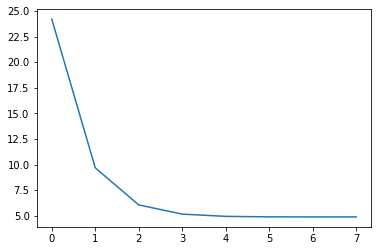

In [96]:
def plot_values(function_values):
    time = [i for i in range(len(function_values))]
    plt.plot(time[:100],function_values[:100])
    plt.show()



plot_values(function_values)


### Seperator

In [ ]:
import pandas as pd

dataframe = pd.read_csv('./data/state_wise_daily.csv')

In [ ]:
summed_data = dataframe.sum(axis=1,numeric_only=True)

In [ ]:
infected_indices = [3*i for i in range(int(len(summed_data)/3))]
indices = [ 3*i+1 for i in range(int(len(summed_data)/3)) ]
indices =  indices +  [ 3*i+2 for i in range(int(len(summed_data)/3)) ]
indices = sorted(indices)


In [ ]:
recovered_deceased = summed_data[indices]

In [ ]:
recovered_dup = recovered_deceased.groupby(recovered_deceased.index//3).transform('sum')
rec_indices = [ 3*i + 1 for i in range(int(len(recovered_dup)//2))]
recovered = recovered_dup[rec_indices]
recovered = recovered.reset_index(drop = True)


In [ ]:
infected = summed_data[infected_indices]
infected = infected.reset_index(drop=True)

In [ ]:
new_dataframe = pd.DataFrame({'infected' :  infected , 'recovered' : recovered})
time_series = new_dataframe.index.array

In [ ]:
time_series_df = pd.DataFrame()
time_series_df.insert(0,"time",time_series)

time_series_df["S(t)"] = 0
time_series_df["I(t)"] = 0
time_series_df.insert(3,"R(t)",new_dataframe['recovered'].cumsum())


In [ ]:
population = 130 * (10**7)
#time_series_df.loc[0,"I(t)"] =  new_dataframe.loc[0,'infected']
#time_series_df.loc[0,"S(t)"] =  population - new_dataframe.loc[0,'infected'] - new_dataframe.loc[0,'recovered']

time_series_df.loc[0,"S(t)"] = population - new_dataframe.loc[0,'infected']
time_series_df.loc[0,"I(t)"] = new_dataframe.loc[0,'infected'] - new_dataframe.loc[0,'recovered'] 

for i in range(1,len(new_dataframe)):
    
    time_series_df.loc[i,"S(t)"] = time_series_df.loc[i-1,"S(t)"] - new_dataframe.loc[i,'infected']
    time_series_df.loc[i,"I(t)"] = time_series_df.loc[i-1,"I(t)"] + (new_dataframe.loc[i,'infected'] - new_dataframe.loc[i,'recovered'])
    #time_series_df.loc[i,"I(t)"] = time_series_df.loc[i-1,"I(t)"] + new_dataframe.loc[i,'infected'] - new_dataframe.loc[i,'recovered']
    #time_series_df.loc[i,"S(t)"] = population - time_series_df.loc[i,"I(t)"] - time_series_df.loc[i,"R(t)"]
 

In [ ]:
time_series_df

In [ ]:

figure,axes = plt.subplots(1,3)
figure.set_figwidth(15)

axes[0].plot(time_series_df['time'],time_series_df['S(t)'] ,color='b', label = 'S(t)')
axes[1].plot(time_series_df['time'],time_series_df['R(t)'] ,color='g', label = 'R(t)')
axes[2].plot(time_series_df['time'],time_series_df['I(t)'] ,color='r', label = 'I(t)')
plt.show()

In [ ]:
new_dataframe

In [ ]:
time_series_df

In [ ]:
for i in range(len(time_series_df)):
    print(time_series_df.loc[i,"I(t)"])

In [ ]:
time_series_df.head()

In [ ]:
derivative_df = pd.DataFrame(0.0,index=np.arange(len(time_series_df)),columns=['ds/dt','di/dt','dr/dt'])

In [ ]:
for i in range(len(time_series_df)):
    if i==0:
        derivative_df.loc[i,"ds/dt"] = (time_series_df.loc[i+1,"S(t)"] - time_series_df.loc[i,"S(t)"])
        derivative_df.loc[i,"di/dt"] = (time_series_df.loc[i+1,"I(t)"] - time_series_df.loc[i,"I(t)"])
        derivative_df.loc[i,"dr/dt"] = (time_series_df.loc[i+1,"R(t)"] - time_series_df.loc[i,"R(t)"])
    elif i == len(time_series_df)-1:
        derivative_df.loc[i,"ds/dt"] = (time_series_df.loc[i,"S(t)"] - time_series_df.loc[i-1,"S(t)"])
        derivative_df.loc[i,"di/dt"] = (time_series_df.loc[i,"I(t)"] - time_series_df.loc[i-1,"I(t)"])
        derivative_df.loc[i,"dr/dt"] = (time_series_df.loc[i,"R(t)"] - time_series_df.loc[i-1,"R(t)"])
    else:
        derivative_df.loc[i,"ds/dt"] = (time_series_df.loc[i+1,"S(t)"] - time_series_df.loc[i-1,"S(t)"])/2.0
        derivative_df.loc[i,"di/dt"] = (time_series_df.loc[i+1,"I(t)"] - time_series_df.loc[i-1,"I(t)"])/2.0
        derivative_df.loc[i,"dr/dt"] = (time_series_df.loc[i+1,"R(t)"] - time_series_df.loc[i-1,"R(t)"])/2.0


In [ ]:
derivative_df.head()

In [ ]:
def cholesky(A):
    n = A.shape[0]
    ANS = np.zeros((A.shape[0],A.shape[1]))
    for j in range(n):
        s = 0.0
        for k in range(j):
            s += ANS[j][k] * ANS[j][k]
        
        ANS[j][j] = np.sqrt(A[j][j] - s)
        for i in range(j+1,n):
            s = 0.0
            for k in range(0,j):
                s += ANS[i][k] * ANS[j][k]
            ANS[i][j] = (1.0/ANS[j][j] * (A[i][j]-s))
    return ANS

def convert_to_symmetric(X):
    return 0.5*(X + X.T)

def back_substitution(A,b):
    solution = np.zeros(A.shape[0])
    for i in range(A.shape[0]- 1, -1,-1):
        tmp = b[i][0]

        for j in range(A.shape[0]-1,i,-1):
            tmp -= solution[j] * A[i,j]
        solution[i] = tmp / A[i,i]
    return solution

def forward_substitute(A,b):
    
    solution = np.zeros(A.shape[0])
    for i in range(A.shape[0]):        
        tmp = b[i][0]
        for j in range(i):
            tmp -= solution[j]*A[i,j]
        solution[i] = tmp / A[i,i]
    return solution

def oneday_solve(day_param,derivative):
    X = np.zeros((3,2))
    y = np.zeros((3,1))
    i_s_n = (day_param.loc['S(t)'] * day_param.loc['I(t)'])/ (population)
    X[0,0] = -i_s_n
    X[1,0] = i_s_n
    X[1,1] = -day_param.loc['I(t)']
    X[2,1] = day_param.loc['I(t)']

    y[0,0] = derivative.loc['ds/dt']
    y[1,0] = derivative.loc['di/dt']
    y[2,0] = derivative.loc['dr/dt']

    A = np.matmul(X.T,X)
    b  = np.matmul(X.T,y)

    A_sym = convert_to_symmetric(A)
    A_tri = cholesky(A_sym)
  
    inter = forward_substitute(A_tri,b)
    inter = np.expand_dims(inter,1)
    sol = back_substitution(A_tri.T,inter)
    solution = nnls(X,y.squeeze())
    
    return sol,solution[0]
    #
    #solution = np.linalg.solve(A,b)
    #print(solution)



In [ ]:
indices = []
plot_points = []

for i in range(len(time_series_df)):

    sol,solution = oneday_solve(time_series_df.loc[i],derivative_df.loc[i])
    plot_points.append(sol[0]/sol[1])
    indices.append(i+1)

In [ ]:
plot_points

In [ ]:
plt.plot(indices[100:],plot_points[100:])

In [ ]:
f = np.array([[1,-1,1],[0,2,-5],[0,0,3]])
b = np.array([[8],[-27],[15]])
back_substitution(f,b)

In [ ]:
f = np.array([[3,0,0],[-5,2,0],[1,-1,1]])
b = np.array([[15],[-27],[8]])
forward_substitute(f,b)

In [ ]:
import numpy as np


matrix = np.array([[4,12,-16],[12,37,-43],[-16,-43,98]])  

cholesky(matrix)
